# Variational Mixture of Gaussians

Gaussian mixture models are widely used to model complex intractable probability distributions using a mixture of Gaussians. We have reviewed GMM and applied a Maximum Likelihood approach to fit a GMM to the Palmer Penguins dataset using the EM algorithm.

Here we descrive the variational inference algorithm to the same dataset. The following plate model is assumed for the variational approximation.
The following plate model in Fig 10.5 from [1] is assumed.

![image.png](./img/GMM_VA_GraphicalModel.png)

The variational approach resolves many of the limitations of the MLE approach.

- Variational approach uses a Bayesian model that enables determining parameter uncertainty
- Prevents over-fitting of data to model
- The cardinality/dimensionality of the latent variable can be determined or inferred by the algorithm.

## Theory
Given a dataset for random variable $x$, we introduce a $K$ dimensional binary random variable $z$ having a 1-of-$K$ representation in which a particular element $z_k = 1$  with $z_i = 0 \text{ } \forall i\ne k$ i.e., $\sum{z_k} = 1$. Assume the dataset has $N$ points. The dataset of observed and latent variables are denoted by $X$ and $Z$ respectively.

The marginal distribution $p(Z,X)$ is defined as $ p(Z,X) = p(X|Z)\cdot p(Z)$.

If $p(z_k = 1) = \pi_k$ and $p(x|z_k=1) = \mathcal{N}(x|\mu_k,\Lambda_k^{-1})$ then, $$\begin{align} p(Z) &= \prod_{n=1}^N \prod_{k=1}^K \pi_k^{z_{nk}} \\
p(X|Z) &= \prod_{n=1}^N \prod_{k=1}^K \Bigg(\mathcal{N}(x|\mu_k,\Lambda_k^{-1})\Bigg)^{z_{nk}} \end{align}$$

The marginal distribution of $X$ is therefore,

$$ \begin{align}  p(X) &= \sum_{z,\pi,\mu,\Lambda} p(X,Z,\pi,\mu,\Lambda) \\
&= \sum_{z,\pi,\mu,\Lambda} p(X|Z,\mu,\Lambda) p(Z|\pi) p(\pi) p(\mu|\Lambda) p(\Lambda) \end{align}$$

We now consider a variational distribution that factorizes the latent variables and parameters as:

$$ q(Z,\pi,\mu,\Lambda) = q(Z)q(\pi,\mu,\Lambda)$$

### Conjugate Priors
We introduce conjugate priors for $\pi$,$\mu$,$\Lambda$ as follows.

For $\pi$ we choose a Dirichlet prior with the same parameter $\alpha_0$ for each component.
$$ p(\pi) = \text{Dir}(\pi|\alpha_0) = C(\alpha_0)\prod_{k=1}^K{\pi_k^{\alpha_0-1}}$$
where $C(\alpha_0)$ is the normalization constant.

For $\mu$ and $\Lambda$, a Gaussian-Wishart prior is chosen for the mean and precision of each component.
$$ \begin{align} p(\mu,\Lambda) &= p(\mu|\Lambda) p(\Lambda) \\
&= \prod_{k=1}^K\mathcal{N}\Big(\mu_k|m_0,(\beta_0\Lambda_k)^{-1})\Big) \mathcal{W}(\Lambda_k|W_0,\nu_0) \end{align}$$

### Optimal factor for $q(Z)$
The update equation for the latent variable is given by,
$$ \begin{align} \ln{q^*(Z)} &= \mathbb{E}_{\pi,\mu,\Lambda}\Big[ \ln{p(X,Z,\pi,\mu,\Lambda}\Big] \\
&= \mathbb{E}_{\pi,\mu,\Lambda}\Big[\ln\Big\{p(X|Z,\mu,\Lambda) p(Z|\pi) p(\pi) p(\mu|\Lambda) p(\Lambda) \Big\}\Big]\end{align}$$

By combining the terms not including $Z$ in the above expression into a constant term,
$$ \begin{align} \ln{q^*(Z)} &= \mathbb{E}_{\pi}\Big[\ln p(Z|\pi)\Big] + \mathbb{E}_{\mu,\Lambda}\Big[\ln{p(X|Z,\pi,\mu)}\Big] + \text{const.}\end{align}$$

$$ \begin{align}\mathbb{E}_{\pi}\Big[\ln p(Z|\pi)\Big] &= \mathbb{E}_{\pi}\Big[\sum_{n=1}^N{\sum_{k=1}^K{z_{nk}\pi_k}}\Big] \\ 
&= \sum_{n=1}^N{\sum_{k=1}^K{z_{nk}\mathbb{E}\Big[\pi_k\Big]}} \end{align}$$

$$ \begin{align}\mathbb{E}_{\mu,\Lambda}\Big[\ln{p(X|Z,\pi,\mu)}\Big] &= \mathbb{E}_{\mu,\Lambda}\Bigg[\sum_{n=1}^N{\sum_{k=1}^K{z_{nk}\Big(-\frac{D}{2}\ln(2\pi) + \frac{1}{2}\ln{|\Lambda_k|} \\
- \frac{1}{2}(x_n-\mu_k)^T \Lambda_k (x_n-\mu_k)\Big)\Bigg]}} \\ 
&= \sum_{n=1}^N{\sum_{k=1}^K{z_{nk}\Bigg(\frac{1}{2}\mathbb{E}\Big[\ln{|\Lambda_k|}\Big] - \frac{D}{2}\ln(2\pi) \\
- \frac{1}{2}\mathbb{E}\Big[(x_n-\mu_k)^T \Lambda_k (x_n-\mu_k)\Big]\Bigg)}} \end{align}$$

Substituting the above 2 expressions above,

$$ \begin{align} \ln{q^*(Z)} &= \sum_{n=1}^N{\sum_{k=1}^K{z_{nk} \rho_{nk}}} + \text{const.}\end{align}$$

where $\rho_{nk}$ is given by,
$$ \rho_{nk} = \mathbb{E}\Big[\pi_k\Big] + \frac{1}{2}\mathbb{E}\Big[\ln{|\Lambda_k|}\Big] - \frac{D}{2}\ln(2\pi) - \frac{1}{2}\mathbb{E}\Big[(x_n-\mu_k)^T \Lambda_k (x_n-\mu_k)\Big]$$

The distribution $q^*(Z)$ is given by,

$$ \Rightarrow q^*(Z) = \prod_{n=1}^N{\prod_{k=1}^K{r_{nk}^{z_{nk}}}}$$

where $r_{nk}$ are the responsibilities with
$$ r_{nk} = \frac{\rho_{nk}}{\sum_{j=1}^K\rho_{nj}}$$

For the discrete distribution $q^*(Z)$, we have $\mathbb{E}\Big[q(z_{nk})\Big] = r_{nk}$

The following provide expressions for the terms in the above expression for $\rho_{nk}$.
$$\begin{align} \mathbb{E}\Big[(x_n-\mu_k)^T \Lambda_k (x_n-\mu_k)\Big] &= D \beta_k^{-1} + \nu_k \mathbb{E}\Big[(x_n-m_k)^T W_k (x_n-m_k)\Big] \\ \mathbb{E}\Big[\ln{|\Lambda_k|}\Big] &= \sum_{i=1}^D \psi\Bigg( \frac{\nu_k+1-i}{2}\Bigg) + D \ln 2 + \ln |W_k| \\
\mathbb{E}\Big[\pi_k\Big] &= \psi(\alpha_k) - \psi(\hat{\alpha}) \end{align}$$

where $\psi(\cdot)$ is the digamma function and $\hat{\alpha} = \sum_k \alpha_k$.

### Optimal factor for $q(\pi,\mu,\Lambda)$
Given the expression for $q^*(Z)$ and $r_{nk}$, the following quantities are defined.

$$ \begin{align} N_k &= \sum_{n=1}^N{r_{nk}} \\
\bar{x}_k&= \frac{1}{N_k}\sum_{n=1}^N{r_{nk}x_n}\\
S_k &= \frac{1}{N_k}\sum_{n=1}^N{r_{nk}(x_n-\bar{x}_k)(x_n-\bar{x}_k)^T} \end{align}$$

Now the optimal factor $q(\pi,\mu,\Lambda)$ is given by

$$ \begin{align} \ln{q^*(\pi,\mu,\Lambda)} &=  \mathbb{E}_{Z}\Big[\ln\Big\{p(X|Z,\mu,\Lambda) p(Z|\pi) p(\pi) p(\mu|\Lambda) p(\Lambda) \Big\}\Big] \\
&= \ln{p(\pi)} + \mathbb{E}_{Z}\Bigg[\sum_{k=1}^K{\ln p(\mu_k,\Lambda_k)} + \ln p(Z|\pi) \\
&+ \sum_{n=1}^N{\sum_{k=1}^K{z_{nk}\ln \mathcal{N}(x_n|\mu_k,\Lambda_k)}} \Bigg] + \text{const.} \\
&= \ln{p(\pi)} + \mathbb{E}_{Z}\Big[\ln p(Z|\pi)\Big] + \sum_{k=1}^K{\ln p(\mu_k,\Lambda_k)}  \\
&+ \sum_{n=1}^N{\sum_{k=1}^K{\mathbb{E}_{Z}\Big[z_{nk}\Big]\ln \mathcal{N}(x_n|\mu_k,\Lambda_k)}} + \text{const.}\end{align}$$

The expression above factorizes into terms involving just $\pi$ and $\mu,\Lambda$ thereby implying independence of these variables. Note that this result is not based on any prior assumption but a direct result of the model.

$$ \begin{align} q^*(\pi,\mu,\Lambda) &= q(\pi) \prod_{k=1}^K{q(\mu,\Lambda)} \\
\text{where}\quad \ln q^*(\pi) &= \ln{p(\pi)} + \mathbb{E}_{Z}\Big[\ln p(Z|\pi)\Big]  + \text{const.}\\
\text{and}\quad \ln q^*(\mu,\Lambda) &= \sum_{k=1}^K{\ln p(\mu_k,\Lambda_k)} 
+ \sum_{n=1}^N{\sum_{k=1}^K{\mathbb{E}_{Z}\Big[z_{nk}\Big]\ln \mathcal{N}(x_n|\mu_k,\Lambda_k)}} + \text{const.}\end{align}$$

### Optimal factor for $q(\pi)$
$$\begin{align} \ln q^*(\pi) &= \ln{p(\pi)} + \mathbb{E}_{Z}\Big[\ln p(Z|\pi)\Big]  + \text{const.} \\
&= (\alpha_0-1)\sum_{k=1}^K{\pi_k} + \sum_{n=1}^N{\sum_{k=1}^K{\mathbb{E}_{Z}[z_{nk}]\pi_k}} + \text{const.} \\
&= (\alpha_0-1)\sum_{k=1}^K{\pi_k} + \sum_{n=1}^N{\sum_{k=1}^K{r_{nk}\pi_k}} + \text{const.} \\
&= (\alpha_0-1)\sum_{k=1}^K{\pi_k} + \sum_{k=1}^K{N_k\pi_k} + \text{const.} \\ &= (\alpha_0+N_k-1)\sum_{k=1}^K{\pi_k} + \text{const.} \\ \end{align}$$

The posterior $q^*(\pi)$ is also a Dirichlet distribution with parameter $\alpha_0+N_k$. i.e. $q^*(\pi) = \text{Dir}(\pi|\alpha_0+N_k)$

### Optimal factor for $q(\mu,\Lambda)$

The derivation for the parameters of the posterior distribution for $q(\mu,\Lambda)$ is very involved, so only the results are presented here. More details can be found in section 10.2.1. in [1]. 

$$\begin{align} q(\mu_k,\Lambda_k) &= \mathcal{N}\Big(\mu_k|m_k,(\beta_k \Lambda_k)^{-1}\Big)\cdot \mathcal{W}(\Lambda_k|W_k,\nu_k) \\
\text{where} \quad \beta_k &= \beta_0 + N_k \\
m_k &= \frac{1}{\beta_k}(\beta_0 m_0 + N_k \bar{x}_k) \\
W_k^{-1} &= W_0^{-1} + N_k S_k + \frac{\beta_0 N_k}{\beta_0+N_k}(\bar{x}_k-m_0)(\bar{x}_k-m_0)^T \\
\nu_k &= \nu_0 + N_k\end{align}$$

## Example
The palmer penguins dataset released by [2] and obtained from [3] is used as an example. Two features - Flipper Length & Culmen Length are used as the features to cluster the dataset. We set K = 6 and demonstrate that 3 of these components are redundant while correctly identifying the 3 correct categories of penguins - Adelie, Chinstrap and Gentoo. This same dataset was used in the GMM section. The dataset is plotted below.

In [1]:
import pandas as pd
import requests
import io
import numpy as np
from scipy.stats import multivariate_normal as gaussian
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.colors as mcolors
from scipy.special import digamma
from scipy.stats import multivariate_normal as gaussian    
from scipy.stats import wishart,dirichlet
from scipy.special import softmax as softmax

def getCSV(url):
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df

file = "https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins-raw.csv"
df = getCSV(file)

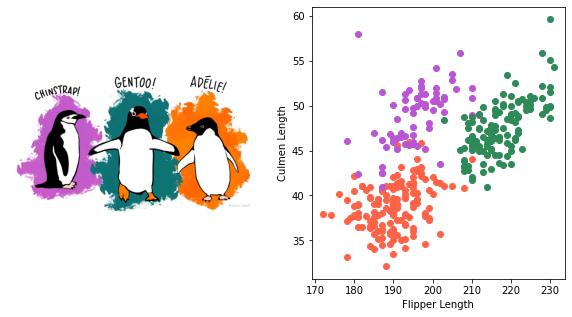

In [2]:
txt_labels = np.unique(df['Species'])
lbl = txt_labels[0]
fig,ax = plt.subplots(1,2,figsize=(10,5))
df_data = [None]*len(txt_labels)
img = mpimg.imread('img/lter_penguins.png')
ax[0].imshow(img)
ax[0].axis('off')
color = ['tomato','mediumorchid','seagreen','aqua','black','magenta']
for i,lbl in enumerate(txt_labels):
    df_data[i] = df[df['Species'] ==  lbl]
#     print(df_data[i].columns)
    ax[1].scatter(df_data[i]['Flipper Length (mm)'],df_data[i]['Culmen Length (mm)'],color=color[i])
# ax[1].axis('off')
ax[1].set_xlabel('Flipper Length');
ax[1].set_ylabel('Culmen Length');

In [3]:
## Number of classes
K = 10

flp_len = np.mean(df['Flipper Length (mm)'])
clm_len = np.mean(df['Culmen Length (mm)'])

df = df[df['Flipper Length (mm)'].notna()]
df = df[df['Culmen Length (mm)'].notna()]
data = np.matrix(np.c_[df['Flipper Length (mm)'],df['Culmen Length (mm)']].T)
# print(data)

x_mean = np.array([[flp_len],[clm_len]])
d = data - np.reshape(x_mean,(2,1))
cov = np.matmul(d,d.T)/float(data.shape[1])
prec = np.linalg.inv(cov)#
## Init
pts = data.shape[1]
m_init = np.mean(data[:,:pts//K],axis=1)
prev = pts//K
for k in range(1,K):
    m_init = np.c_[m_init,np.mean(data[:,prev+1:prev+1+(pts//K)],axis=1)]
    prev = prev+1+(pts//K)
m_init = np.matrix(m_init)
print(m_init)
# m_init = data[:,-K:]
# m_init = data[:,10:10+K]
# m_init = data[:,:K]
# m_init = np.matrix(np.c_[data[:,0],data[:,200],data[:,-1]])
# m_init = data[:,:K]
# m_init = np.matrix(np.random.randn(2,K))
beta_init  = np.array([1. for k in range(K)])
W_init  = [prec for k in range(K)]
nu_init = np.array([2. for k in range(K)])
alpha_init = np.array([0.001 for k in range(K)])

[[186.35294118 188.55882353 191.85294118 192.88235294 206.82352941
  215.82352941 219.58823529 214.38235294 194.38235294 197.51851852]
 [ 38.64411765  38.92941176  38.51764706  39.44117647  43.96176471
   46.76470588  48.07058824  48.46176471  48.84411765  48.88518519]]


In [4]:
## Variational Approximation
def getZ(X,m,beta,W,nu,alpha):
    dig_alpha = digamma(np.sum(alpha))
    D = X.shape[0]
    N = X.shape[1]
    rho = np.zeros((N,K))
    r = np.zeros((N,K))
    for k in range(K):
        E_ln_pi_k  = digamma(alpha[k]) - dig_alpha
        
        E_ln_sig_k = float(D)*np.log(2) + np.log(np.linalg.det(W[k]))
        for i in range(1,D+1):
            E_ln_sig_k = E_ln_sig_k + digamma(0.5*(nu[k]+1-i))
        
        tmpSum = E_ln_pi_k + 0.5*E_ln_sig_k - 0.5*float(D)*np.log(2*np.pi)
        for n in range(N):
            dx = X[:,n] - m[:,k]
            E_mu_sig = float(D)/beta[k] + nu[k]*np.matmul(dx.T,np.matmul(W[k],dx))
            rho[n,k] = tmpSum - 0.5*E_mu_sig
    for n in range(N):
        rho[n,:] = softmax(rho[n,:])
    return rho

def getHelperVariables(X,r):
    Nk = np.sum(r,axis=0)
    
    x = np.matrix(np.zeros((X.shape[0],K)))
    for k in range(K):
        if Nk[k] != 0:
            for n in range(X.shape[1]):
                x[:,k] = x[:,k] + r[n,k]/Nk[k]*X[:,n]
    
    S = [0*np.eye(X.shape[0]) for k in range(K)]
    for k in range(K):
        if Nk[k] != 0:
            for n in range(X.shape[1]):
                dx = X[:,n]-x[:,k]
                S[k] = S[k] + r[n,k]*np.matmul(dx,dx.T)/Nk[k]
    return Nk,x,S
            
def getMu(m0,beta0,Nk,x):
    beta = beta0+Nk
#     m = (beta0*m0 + Nk*x)/beta
    m = (np.multiply(beta_init,m_init) + np.multiply(Nk,x))/beta
    return m,beta
        
def getPi(alpha0,Nk):
    return alpha0+Nk
    
def getSigma(m0,beta0,W0_inv,nu0,Nk,x,S):
    nu = nu0+Nk
    Wk = [0*np.eye(2) for k in range(K)]
    for k in range(K):
        dx = x[:,k]-m0[:,k]
        Wk_inv = W0_inv[k] + Nk[k]*S[k] + beta0[k]*Nk[k]/(beta0[k]+Nk[k])*np.matmul(dx,dx.T)
        Wk[k] = np.linalg.inv(Wk_inv)
    return Wk,nu

def getLogLikelihood(X,r,Nk,x,S,m,beta,W,nu,alpha):
    pi = Nk/float(X.shape[1])
    logLikelihood = 0
    eps = 1E-20*np.ones(pi.shape)
    pi_new = np.maximum(pi,eps)
    pi_new = pi_new/np.sum(pi_new)
    logLikelihood = 0#dirichlet.logpdf(pi_new,alpha)
    pi1 = np.array([])
    alpha1 = np.array([])
    for k in range(K):
        if pi[k] == 0:
            continue
        pi1 = np.append(pi1,np.array([pi[k]]))
        alpha1 = np.append(alpha1,np.array([alpha[k]]))
        prec = np.linalg.inv(S[k])
        cv_mat = S[k]/beta[k]
        log_mu = np.log(gaussian.pdf(np.ravel(x[:,k]),mean=np.ravel(m[:,k]),cov=cv_mat))
        log_sig = np.log(wishart.pdf(prec,df=nu[k],scale=W[k]))
        logLikelihood = logLikelihood + log_mu + log_sig
        
    for n in range(X.shape[1]):
        prob = 0
        for k in range(K):
#             if np.linalg.det(S[k]) == 0:
            if pi[k] == 0:
                continue
            prob = prob + pi[k]*gaussian.pdf(np.ravel(X[:,n]),mean=np.ravel(x[:,k]),cov=S[k])
        logLikelihood = logLikelihood + np.log(prob)
    logLikelihood = logLikelihood + dirichlet.logpdf(pi1,alpha1)#dirichlet.logpdf(pi_new,alpha)#
    return logLikelihood

In [5]:
def VariationalGMM(X,m0,beta0,W0,nu0,alpha0,max_iter=500,tol=1E-6):
    m1    = m0
    beta1 = beta0
    W1    = W0.copy()
    nu1   = nu0
    alpha1=alpha0

    W0_inv = []
    for k in range(K):
        W0_inv += [np.linalg.inv(W0[k])]

    c = 0
    logLikelihood = []
    while c < max_iter:
        r = getZ(data,m1,beta1,W1,nu1,alpha1)

        Nk,x,S = getHelperVariables(data,r)   
        
        m,beta = getMu(m0,beta0,Nk,x)

        alpha = getPi(alpha0,Nk)

        W,nu = getSigma(m0,beta0,W0_inv,nu0,Nk,x,S)
        
        logLikelihood.append(getLogLikelihood(X,r,Nk,x,S,m,beta,W,nu,alpha))
#         print(c,logLikelihood[-1],np.round(Nk,3))
        max_diff = np.max(np.abs(beta-beta1))
        max_diff = max(max_diff,np.max(np.abs(alpha-alpha1)))
        max_diff = max(max_diff,np.max(np.abs(nu-nu1)))
        max_diff = max(max_diff,np.max(np.abs(m-m1)))
        for k in range(K):
            max_diff = max(max_diff,np.max(np.abs(W[k]-W1[k])))
        m1    = m
        beta1 = beta
        W1    = W.copy()
        nu1   = nu
        alpha1=alpha
        if max_diff <= tol:
            print("Algorithm converged after iteration:",c)
            break
        c = c+1
    print("Final Log Likelihood:",logLikelihood[-1])
    print("Effective cluster size:",np.round(Nk,3))
    return m,beta,W,nu,alpha,logLikelihood

def confidence_ellipse(ax, mu, cov, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    cov : Covariance matrix
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
#     if cov != cov.T:
#         raise ValueError("Not a valid covariance matrix")

#     cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mu[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mu[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [6]:
m,beta,W,nu,alpha,logLikelihood = VariationalGMM(data,m_init,beta_init,W_init,nu_init,alpha_init)#,max_iter=1000)

Algorithm converged after iteration: 148
Final Log Likelihood: -2199.653956297383
Effective cluster size: [  0.      0.    148.792   0.      0.    130.389   0.      0.      1.132
  61.688]


#### Determining optimal number of clusters

In [7]:
k_idx = []
dist_tol = 1E-6
r = getZ(data,m,beta,W,nu,alpha)
Nk,x,S = getHelperVariables(data,r)
m_final = None
beta_final = None
alpha_final = None
W_final = None
nu_final = None
N_final = None
x_final = None
S_final = None
for k in range(K):
    dist = np.linalg.norm(m[:,k]-m_init[:,k])
    if dist >= 1E-6 and Nk[k] >= 1:#0.01*data.shape[1]:
        if m_final is None:
            m_final = m[:,k]
            beta_final = np.array([beta[k]])
            alpha_final = np.array([alpha[k]])
            nu_final = np.array([nu[k]])
            W_final = [W[k]]
            N_final = np.array([Nk[k]])
            x_final = x[:,k]
            S_final = [S[k]]
        else:
            m_final = np.c_[m_final,m[:,k]]
            beta_final = np.append(beta_final,np.array([beta[k]]))
            alpha_final = np.append(alpha_final,np.array([alpha[k]]))
            nu_final = np.append(nu_final,np.array([nu[k]]))
            W_final += [W[k]]
            N_final = np.append(N_final,np.array([Nk[k]]))
            x_final = np.c_[x_final,x[:,k]]
            S_final += [S[k]]

K_final = x_final.shape[1]
print("Number of actual clusters:",K_final)
print()
print("Cluster Means:")
print(x_final)
print()
print("Cluster Covariance")
for k in range(K_final):
    print(S_final[k])

Number of actual clusters: 4

Cluster Means:
[[189.3128161  216.55057185 182.07307154 196.19772708]
 [ 38.75547148  47.27299022  56.98587604  49.06080624]]

Cluster Covariance
[[35.94386692  3.55981486]
 [ 3.55981486  6.92690337]]
[[47.61652171 15.77126996]
 [15.77126996 10.59665065]]
[[17.21662508 -7.1001078 ]
 [-7.1001078   8.94857704]]
[[35.18552793 10.10415175]
 [10.10415175  7.84172856]]


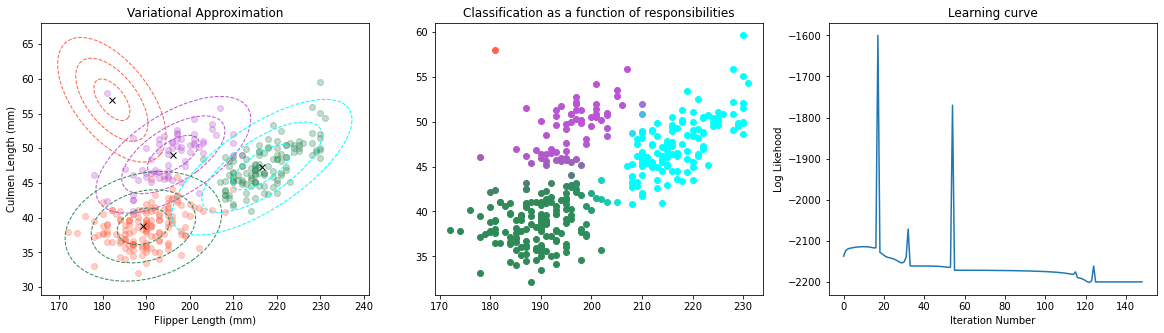

In [8]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
K = K_final
r = getZ(data,m_final,beta_final,W_final,nu_final,alpha_final)
Nk,x,S = getHelperVariables(data,r)
Nk = np.sum(r,axis=0)
for n in range(data.shape[1]):
    rgb = np.array([0,0,0])
    for k in range(K):
        rgb = rgb+r[n,(k+2)%K]*np.array(mcolors.to_rgb(color[k]))
    ax[1].scatter(data[0,n],data[1,n],color=rgb)
ax[1].set_title('Classification as a function of responsibilities')
for k in range(3):
    ax[0].scatter(df_data[k]['Flipper Length (mm)'],df_data[k]['Culmen Length (mm)'],color=color[k],alpha=0.3)

for k in range(K):
    ki = (k+2)%K
    ax[0].plot(x_final[0,ki],x_final[1,ki],'kx')
    for i in range(3):
        confidence_ellipse(ax[0],x_final[:,ki],S_final[ki],i+1,edgecolor=color[k],linestyle='dashed')
        
ax[0].set_title('Variational Approximation')
ax[0].set_xlabel('Flipper Length (mm)');
ax[0].set_ylabel('Culmen Length (mm)');

ax[2].plot(range(len(logLikelihood)),logLikelihood);
ax[2].set_title('Learning curve');
ax[2].set_ylabel('Log Likehood');
ax[2].set_xlabel('Iteration Number');

## References
[1]: Bishop, Christopher M. 2006. Pattern Recognition and Machine Learning. Springer.

[2]: Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/.

[3]: CSV data downloaded from https://github.com/mcnakhaee/palmerpenguins

[4]: Code for plotting confidence ellipses from https://matplotlib.org/3.1.0/gallery/statistics/confidence_ellipse.html
